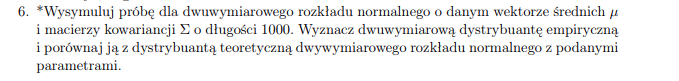

In [25]:
import numpy as np

In [26]:
mean = [1,2]
cov = [[2,1], [1,2]]
sigma = np.matrix(cov)
mi = np.matrix(mean).reshape(2,1)

W pierwszym kroku będziemy chcieli znaleźć macierz dolnotrójkątną $\textbf{A}$ taką, że $\textbf{A}\textbf{A}^T = \Sigma$. Weźmy 
$$ \textbf{A} = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
$$
I przyrównajmy 
$$
\textbf{A} \textbf{A}^T = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{21} \\
0 & a_{22}
\end{bmatrix} 
=
\begin{bmatrix}
a_{11}^2 & a_{21}a_{11} \\
a_{21}a_{11} & a_{22}^2 + a_{21}^2
\end{bmatrix} 
=
\begin{bmatrix}
s_{11} & s_{12} \\
s_{21} & s_{22}
\end{bmatrix} = \Sigma
$$
Stąd mamy 

\begin{equation*}
\begin{split}
a_{11} &= \sqrt{s_{11}} \\
a_{21} &= \frac{s_{21}}{a_{11}} \\
a_{22} &= \sqrt{s_{22} - a_{21}^2}

\end{split}
\end{equation*}


In [27]:
def cholesky_decomposition(sigma):
    s11 = sigma.item((0,0))
    s12 = sigma.item((0,1))
    s21 = sigma.item((1,0))
    s22 = sigma.item((1,1))
    a11 = np.sqrt(s11)
    a21 = s21/a11
    a22 = np.sqrt(s22 - a21**2)
    return np.matrix([[a11, 0], [a21, a22]])

W drugim kroku generujemy $n$ wektorów dwuwymiarowych $\textbf{Z}_i$, których składowe to niezależne zmienne losowe o standardowym rozkładzie normalnym.

In [28]:
n = 1000
Z = np.random.normal(loc = 0, scale = 1, size = 2 * n).reshape(2,n)
A = cholesky_decomposition(sigma)

Aby otrzymać szukane wektory $\textbf{X}_i$ o rozkładzie dwuwymiarowym normalnym wystarczy wykonać przekształcenie
$$
\textbf{X}_i = \mu + \textbf{A}\textbf{Z}_i
$$

In [29]:
X = np.array((mi + np.dot(A, Z)).reshape(n, 2))


In [51]:
t1 = np.linspace(-4,4,200)
t2 = np.linspace(-4,4,200)
T1, T2 = np.meshgrid(t1, t2)
pos1 = np.dstack((T1, T2))


def ecdf(sample, pos):
    sample.sort()
    result = np.zeros((200,200))
    for i in range(len(pos)):
        for j in range(len(pos[i])):
            sum1 = 0
            for k in range(len(sample[0])):
                if sample[0][k]<= pos[i][j][0] and sample[1][k]<= pos[i][j][1] :
                    sum1 += 1
            result[i][j] = (sum1/len(sample[0]))
    return result

In [52]:
empirical = ecdf(X, pos1)

In [56]:
print(empirical)

[[0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.006 0.006 ... 0.006 0.006 0.006]
 [0.001 0.006 0.011 ... 0.011 0.011 0.011]
 ...
 [0.001 0.006 0.011 ... 0.989 0.989 0.989]
 [0.001 0.006 0.011 ... 0.989 0.994 0.994]
 [0.001 0.006 0.011 ... 0.989 0.994 1.   ]]


In [14]:


# Generowanie próbek z dwuwymiarowego rozkładu normalnego
samples = X

samples_sorted = samples[np.argsort(samples[:, 0])]

# Obliczanie dwuwymiarowej dystrybuanty empirycznej
empirical_cdf = np.empty_like(samples_sorted)

for i in range(len(samples_sorted)):
    x = samples_sorted[i, 0]
    y = samples_sorted[i, 1]
    empirical_cdf[i] = [np.sum(samples_sorted[:, 0] <= x) / n,
                        np.sum(samples_sorted[:, 1] <= y) / n]


In [19]:
print(empirical_cdf)

[[0.001 0.25 ]
 [0.002 0.11 ]
 [0.003 0.164]
 ...
 [0.998 0.653]
 [0.999 0.595]
 [1.    0.756]]


In [15]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm

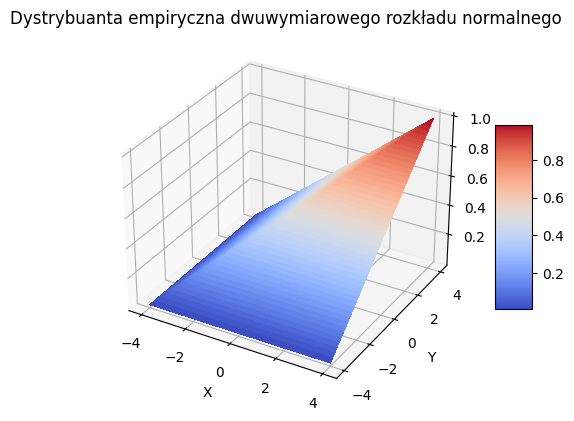

In [53]:


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Tworzenie dwuwymiarowego rozkładu normalnego

# Utworzenie siatki punktów dla wykresu
x1 = np.linspace(-4, 4, 200)
y1 = np.linspace(-4, 4, 200)
X1, Y1 = np.meshgrid(x1, y1)
pos2 = np.dstack((X1, Y1))


# Wykres konturowy dystrybuanty
surf = ax.plot_surface(X1, Y1, empirical, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dystrybuanta empiryczna dwuwymiarowego rozkładu normalnego')
plt.show()

[[7.41017973e-07 7.88871643e-07 8.39064432e-07 ... 1.10452440e-05
  1.10452447e-05 1.10452453e-05]
 [8.15918331e-07 8.68973689e-07 9.24650155e-07 ... 1.25324559e-05
  1.25324568e-05 1.25324575e-05]
 [8.97534594e-07 9.56298538e-07 1.01799630e-06 ... 1.42089253e-05
  1.42089263e-05 1.42089272e-05]
 ...
 [2.03456163e-04 2.26479542e-04 2.51916104e-04 ... 9.01662449e-01
  9.02503495e-01 9.03288406e-01]
 [2.03458581e-04 2.26482396e-04 2.51919468e-04 ... 9.05843232e-01
  9.06700182e-01 9.07500172e-01]
 [2.03460720e-04 2.26484921e-04 2.51922448e-04 ... 9.09854583e-01
  9.10727231e-01 9.11542110e-01]]


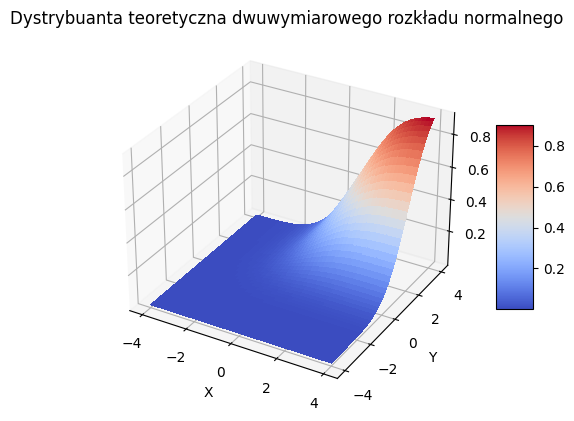

In [55]:



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Tworzenie dwuwymiarowego rozkładu normalnego
bivariate_normal = multivariate_normal(mean=mean, cov=cov)

# Utworzenie siatki punktów dla wykresu
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))


# Obliczenie wartości dystrybuanty dla każdego punktu siatki
Z = bivariate_normal.cdf(pos)
print(Z)
# Wykres konturowy dystrybuanty
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dystrybuanta teoretyczna dwuwymiarowego rozkładu normalnego')
plt.show()